# **Sampling Assignment**

||||
|---|----|----|
|**NAME** | **ROLL NO** | **Email**  |
| Arshpreet Singh |  102017045| asingh26_be20@thapar.edu |

### **Step 1 :**

- Download the data-set from the given below link


https://github.com/AnjulaMehto/Sampling_Assignment/blob/main/Creditcard_data.csv

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Set the URL of the dataset
url = 'https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv'

# Set the filename to save the dataset
filename = 'Creditcard_data.csv'

# Download the dataset from the URL and save it to a local file
urllib.request.urlretrieve(url, filename)

print('Dataset downloaded successfully.')

Dataset downloaded successfully.


### **Step 2 :**

- Convert this data-set into balanced class data-set.

In [3]:
                                                                # Load the credit card dataset
data = pd.read_csv('Creditcard_data.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Separate the features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

In [6]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [7]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Class, dtype: int64

In [8]:
# Check the class balance
class_counts = y.value_counts()
print(f'Class counts:\n{class_counts}')

Class counts:
0    763
1      9
Name: Class, dtype: int64


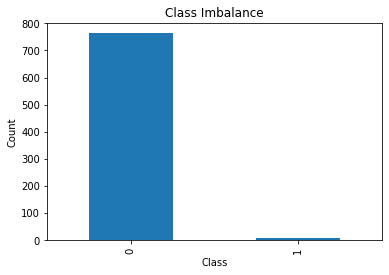

In [9]:
# Create a bar chart to visualize the class imbalance
fig, ax = plt.subplots()
class_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Imbalance')
plt.show()

In [10]:
# Calculate the class imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print(f'Class imbalance ratio: {imbalance_ratio:.2f}')

Class imbalance ratio: 84.78


In [11]:
# Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Concatenate the undersampled and oversampled data
X_balanced = pd.concat([X_undersampled, X_oversampled])
y_balanced = pd.concat([y_undersampled, y_oversampled])

# Verify the class balance
print(y_balanced.value_counts())

0    772
1    772
Name: Class, dtype: int64


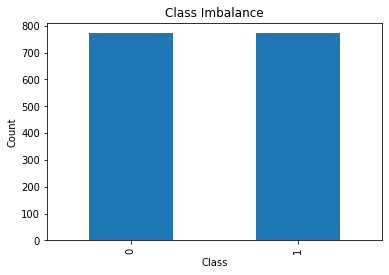

In [12]:
# Create a bar chart to visualize the class balance
fig, ax = plt.subplots()
class_counts1 = y_balanced.value_counts()
class_counts1.plot(kind='bar', ax=ax)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Imbalance')
plt.show()

### **Step 3 :**

Deciding 5 Models to be applied using Pycaret

In [13]:
DataSet = pd.concat([X_balanced , y_balanced] , axis = 1)

In [14]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1525
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1544 non-null   int64  
 1   V1      1544 non-null   float64
 2   V2      1544 non-null   float64
 3   V3      1544 non-null   float64
 4   V4      1544 non-null   float64
 5   V5      1544 non-null   float64
 6   V6      1544 non-null   float64
 7   V7      1544 non-null   float64
 8   V8      1544 non-null   float64
 9   V9      1544 non-null   float64
 10  V10     1544 non-null   float64
 11  V11     1544 non-null   float64
 12  V12     1544 non-null   float64
 13  V13     1544 non-null   float64
 14  V14     1544 non-null   float64
 15  V15     1544 non-null   float64
 16  V16     1544 non-null   float64
 17  V17     1544 non-null   float64
 18  V18     1544 non-null   float64
 19  V19     1544 non-null   float64
 20  V20     1544 non-null   float64
 21  V21     1544 non-null   float64
 22  

In [15]:
DataSet.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,265,-0.491003,0.906953,1.645423,-0.083531,-0.195560,-0.710165,0.559119,0.116340,-0.538190,...,-0.168067,-0.517387,0.018650,0.491652,-0.277795,0.043841,0.253372,0.111749,9.03,0
1,184,-0.143256,0.743649,1.534072,1.062170,0.208187,-0.838623,0.524151,-0.294661,-0.478856,...,-0.205014,-0.460893,0.047407,0.339243,-0.779439,0.234456,-0.024125,-0.049898,1.98,0
2,566,1.166360,0.005061,0.497768,0.798920,-0.365524,-0.233421,-0.074210,-0.008325,0.437687,...,-0.195728,-0.365798,0.030729,0.123133,0.381749,0.296735,-0.007175,0.011905,18.56,0
3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,246,-1.069200,1.239963,0.545157,1.005354,-0.025696,-0.910673,0.422442,0.049283,-0.564601,...,0.146555,0.602990,0.132656,0.427113,-0.084030,-0.417194,-0.897885,-0.462042,2.98,0


In [16]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [17]:
from pycaret.utils import version
version()

'2.3.10'

In [18]:
from pycaret.classification import *
setup(data=DataSet, target='Class',
      remove_outliers = True, outliers_threshold = 0.05, 
      normalize = True, normalize_method = 'zscore', 
      transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.555
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.515
gbc,Gradient Boosting Classifier,0.9990,1.0000,1.0000,0.9982,0.9991,0.9981,0.9981,0.844
ada,Ada Boost Classifier,0.9971,1.0000,1.0000,0.9946,0.9973,0.9943,0.9943,0.559
lightgbm,Light Gradient Boosting Machine,0.9952,1.0000,1.0000,0.9913,0.9955,0.9904,0.9906,0.725
dt,Decision Tree Classifier,0.9943,0.9940,1.0000,0.9894,0.9946,0.9885,0.9887,0.025
knn,K Neighbors Classifier,0.9789,0.9909,1.0000,0.9622,0.9805,0.9576,0.9590,0.028
svm,SVM - Linear Kernel,0.9560,0.0000,0.9670,0.9519,0.9573,0.9119,0.9160,0.030
lr,Logistic Regression,0.9551,0.9798,1.0000,0.9225,0.9593,0.9094,0.9140,0.355
ridge,Ridge Classifier,0.9321,0.0000,1.0000,0.8865,0.9395,0.8629,0.8719,0.028


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1413, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


### **5 Models** 


- Random Forest Classifier

- Extra Trees Classifier

- Gradient Boosting Classifier

- Decision Tree Classifier

- Ada Boost Classifier


### **4 Sampling Techniques**

- simple random sampling
- systematic sampling
- stratified sampling
- cluster sampling

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [20]:
# Load credit card dataset from CSV file
creditcard_df = DataSet
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,265,-0.491003,0.906953,1.645423,-0.083531,-0.195560,-0.710165,0.559119,0.116340,-0.538190,...,-0.168067,-0.517387,0.018650,0.491652,-0.277795,0.043841,0.253372,0.111749,9.03,0
1,184,-0.143256,0.743649,1.534072,1.062170,0.208187,-0.838623,0.524151,-0.294661,-0.478856,...,-0.205014,-0.460893,0.047407,0.339243,-0.779439,0.234456,-0.024125,-0.049898,1.98,0
2,566,1.166360,0.005061,0.497768,0.798920,-0.365524,-0.233421,-0.074210,-0.008325,0.437687,...,-0.195728,-0.365798,0.030729,0.123133,0.381749,0.296735,-0.007175,0.011905,18.56,0
3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,246,-1.069200,1.239963,0.545157,1.005354,-0.025696,-0.910673,0.422442,0.049283,-0.564601,...,0.146555,0.602990,0.132656,0.427113,-0.084030,-0.417194,-0.897885,-0.462042,2.98,0


In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(creditcard_df.drop('Class', axis=1), creditcard_df['Class'], test_size=0.2, random_state=42)

In [22]:
# Create clusters using k-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
creditcard_df['Cluster'] = kmeans.fit_predict(creditcard_df.drop('Class', axis=1))
# Perform cluster sampling
cluster_sample = pd.concat([creditcard_df[creditcard_df['Cluster'] == i].sample(n=10, random_state=42 , replace = True) for i in range(5)], ignore_index=True)
cluster_sample = cluster_sample.drop('Cluster', axis = 1)
cluster_sample.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,514,-1.045042,0.957421,1.388023,0.195389,-0.327385,-0.643710,0.521262,0.174238,0.063058,...,-0.182403,-0.311953,-0.140268,0.400592,-0.050207,0.201240,-0.092265,-0.134806,30.49,0
1,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
2,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
3,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
4,518,-0.641320,0.738098,1.916436,-0.162040,0.371740,-0.203711,0.734552,-0.106378,-0.650380,...,-0.098913,-0.232043,-0.011842,0.214894,-0.486273,0.004232,-0.226933,-0.092456,9.99,0


In [23]:
# Perform simple random sampling
srs_sample = creditcard_df.sample(n=500, random_state=42)
srs_sample = srs_sample.drop('Cluster', axis = 1)
srs_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1476,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
525,389,-1.581927,1.754753,0.796003,-0.558084,0.302975,-0.068701,0.776211,-0.057165,1.036104,...,-0.511518,-0.729446,-0.029177,-0.430328,-0.012086,0.080318,0.540107,0.034934,8.93,0
1250,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
510,376,0.894056,-0.031001,1.514665,2.587276,-0.222693,1.987772,-0.922106,0.782940,0.181510,...,0.052819,0.394703,0.212676,-0.654428,-0.089633,0.066054,0.107787,0.024676,11.39,0
1076,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1


In [24]:
# Perform systematic sampling
systematic_sample = creditcard_df.iloc[::3, :]
systematic_sample = systematic_sample.drop('Cluster', axis = 1)
systematic_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,265,-0.491003,0.906953,1.645423,-0.083531,-0.195560,-0.710165,0.559119,0.116340,-0.538190,...,-0.168067,-0.517387,0.018650,0.491652,-0.277795,0.043841,0.253372,0.111749,9.03,0
3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
6,574,-0.402057,0.584300,2.474227,0.929684,0.014314,0.297490,0.715195,-0.257153,0.593868,...,-0.072812,0.445733,-0.245103,0.421234,0.049280,-0.388323,-0.329333,-0.386747,12.00,0
9,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
12,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1


In [25]:
# Perform stratified sampling
stratified_sample = creditcard_df.groupby('Class').apply(lambda x: x.sample(n=250, random_state=42)).reset_index(drop=True)
stratified_sample = stratified_sample.drop('Cluster', axis = 1)
stratified_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,399,1.091666,0.068682,1.230334,2.554474,-0.454169,0.915781,-0.701016,0.396866,0.307571,...,-0.098440,-0.178428,0.007277,-0.504025,0.255974,0.022213,0.048714,0.027057,15.19,0
1,137,0.753308,-1.131593,0.878730,0.297871,-1.327250,0.066596,-0.535276,0.171133,1.184602,...,0.031912,-0.213298,-0.091660,0.151837,-0.067673,0.999073,-0.063985,0.049174,226.07,0
2,260,1.075229,-0.335339,1.680468,1.192098,-1.270531,0.313498,-0.871025,0.235402,1.315261,...,0.092930,0.815227,-0.054551,0.731149,0.431465,0.580189,0.062528,0.025628,5.46,0
3,297,-1.148038,0.367626,2.769717,-0.356562,-0.268456,0.323423,-0.108718,0.452755,0.166990,...,0.063334,0.168210,-0.194521,0.228655,0.107744,0.222331,-0.109160,0.089767,6.20,0
4,430,1.331282,-0.460775,0.201621,-0.582848,-0.815358,-0.863857,-0.272425,-0.228814,-1.194789,...,0.239532,0.718030,-0.181652,0.617561,0.760131,-0.100635,-0.009469,0.001407,30.00,0


In [26]:
# Define the models to be tested
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42)
}

In [27]:
# Define a function to fit a model and return its accuracy score
def fit_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [28]:
# Test each model on each sampling technique
results = {}
for model_name, model in models.items():
    for sample_name, sample in zip(['Simple Random', 'Systematic', 'Stratified', 'Cluster'], [srs_sample, systematic_sample, stratified_sample, cluster_sample]):
        accuracy = fit_model(model, sample.drop(['Class'], axis=1), sample['Class'], X_test, y_test)
        results.setdefault(model_name, {})[sample_name] = accuracy

In [29]:
# Display the results as a table
results_df = pd.DataFrame(results)
results_df.index.name = 'Sampling Technique'
print(results_df)

                    Random Forest  Extra Trees  Gradient Boosting  \
Sampling Technique                                                  
Simple Random            1.000000     1.000000           1.000000   
Systematic               1.000000     1.000000           0.996764   
Stratified               1.000000     1.000000           1.000000   
Cluster                  0.779935     0.841424           0.870550   

                    Decision Tree  Ada Boost  
Sampling Technique                            
Simple Random            1.000000   1.000000  
Systematic               0.980583   1.000000  
Stratified               0.993528   1.000000  
Cluster                  0.737864   0.864078  
